In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from matplotlib.image import imread
import seaborn as sns

In [2]:
os.listdir("cats_and_dogs dataset/")

['train', 'validation']

In [3]:
train_dir = os.path.join("cats_and_dogs dataset/train")
validation_dir = os.path.join("cats_and_dogs dataset/validation")

-------------

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

In [5]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [6]:
# re-size all the images to this
input_shape = (224,224,3)

In [7]:
vgg = VGG16(input_shape=input_shape,
                    weights = 'imagenet',
                    include_top=False)

In [8]:
# Freeze the weights of the layers.
for layer in vgg.layers:
    layer.trainable = False

In [9]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# our layers - you can add more if you want

x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

# Append the dense network to the base model
model = Model(inputs = vgg.input, outputs = x)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

### Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255.,rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale= 1./255.)

In [16]:
training_set = train_datagen.flow_from_directory(train_dir,target_size= (224,224),
                                                 batch_size=16,class_mode= "binary")

Found 2000 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(validation_dir,target_size= (224,224),batch_size= 16, class_mode= "binary")

Found 1000 images belonging to 2 classes.


In [18]:
# fit the model
model.fit(training_set,validation_data= test_set,epochs= 5,
          steps_per_epoch = 100, validation_steps = 50)

Epoch 1/5
100/100 [==============================] - 656s 7s/step - loss: 1.4024 - accuracy: 0.5844 - val_loss: 0.4629 - val_accuracy: 0.7962
Epoch 2/5
100/100 [==============================] - 663s 7s/step - loss: 0.5694 - accuracy: 0.7013 - val_loss: 0.4052 - val_accuracy: 0.7950
Epoch 3/5
100/100 [==============================] - 659s 7s/step - loss: 0.5168 - accuracy: 0.7350 - val_loss: 0.4034 - val_accuracy: 0.8462
Epoch 4/5
100/100 [==============================] - 646s 6s/step - loss: 0.5161 - accuracy: 0.7300 - val_loss: 0.4209 - val_accuracy: 0.8650
Epoch 5/5
100/100 [==============================] - 557s 6s/step - loss: 0.5017 - accuracy: 0.7419 - val_loss: 0.3287 - val_accuracy: 0.8462


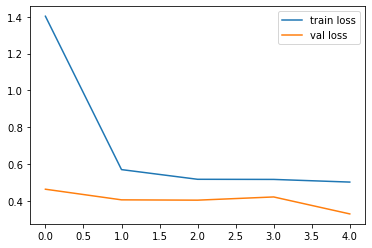

In [19]:
# loss
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

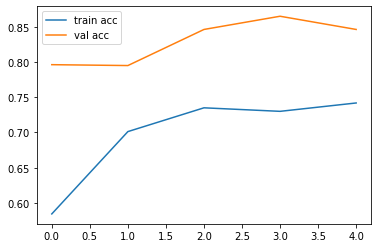

In [20]:
# accuracies
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [23]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
def img(x):
    
    img = image.load_img(x,target_size= (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    a = model.predict(img)

    if a > 0.5:
        print("dogs: 1")
    else:
        print("cats: 0")

In [32]:
img("cat_3.jpg")

cats: 0


In [34]:
model.save("saved_model_VGG16.h5")

------------